In [79]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import time

In [80]:
def initTranformRadarToPng ():
    RadarValues99 = np.asanyarray(pickle.load(open("RadarValues99PercentDatapoints.p", "rb")))
    maxValue = 40 # actual maxVal = maxVal + 99% Quanil (which is 1,39)
    remaining_range = 255-len(RadarValues99)
    scaleFactor = remaining_range/maxValue
    maxOfRadarValues99 = max(RadarValues99[:,0])
    RadarValues99 = np.sort(RadarValues99[:,0])
    return RadarValues99, maxOfRadarValues99, scaleFactor
    
def transformRadarDataToPng (radarData, RadarValues99, maxOfRadarValues99, scaleFactor):
    #scale values which are larger than maxOfRadarValues99
    radarData = np.where(radarData>maxOfRadarValues99, 
                         ((radarData-maxOfRadarValues99)*scaleFactor+len(RadarValues99)).astype(int), 
                         radarData)
    #set values that are larger than 255 to 255
    radarData[radarData>255]=255

    for idx in range(1,len(RadarValues99)):
        radarData[(radarData<=RadarValues99[-idx]) & (radarData>RadarValues99[-idx-1])] = len(RadarValues99)-idx

    radarData[(radarData>0) & (radarData<RadarValues99[0])]=1
    return radarData


    

start
--- 0.2367093563079834 seconds ---
done
Original Rain Data 
Values <=0 are filtered out 


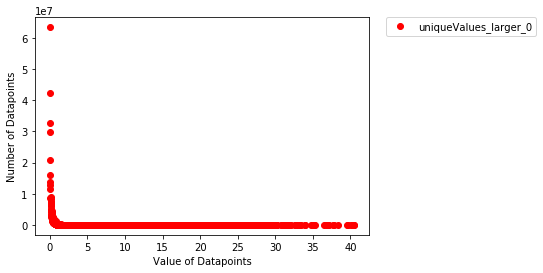

In [81]:
data = np.random.uniform(low = 0, high = 45, size = (1000,1000))
RadarValues99, maxOfRadarValues99, scaleFactor = initTranformRadarToPng()
RadarValues99
print("start")
start_time = time.time()
pngData = transformRadarDataToPng(data, RadarValues99, maxOfRadarValues99, scaleFactor)
print("--- %s seconds ---" % (time.time() - start_time))
print("done")
val, num = np.unique(pngData, return_counts = True)

uniqueValues = np.asanyarray(pickle.load(open("YW2017.002_201606_countUniqueValues.p", "rb")))
uniqueValues_larger_0 = np.asanyarray([value for value in uniqueValues if value[0] > 0])

print("Original Rain Data \nValues <=0 are filtered out ")
plt.plot(uniqueValues_larger_0[:,0], uniqueValues_larger_0[:,1], 'ro', label= "uniqueValues_larger_0")
plt.ylabel('Number of Datapoints')
plt.xlabel('Value of Datapoints')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#plt.plot(final_scaled_png[:,0], final_scaled_png[:,1], 'ro', label= "final_scaled_png")
#plt.ylabel('Number of Datapoints')
#plt.xlabel('Value of Datapoints')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.show()



In [82]:
def transformPngToRadarValue (radarData, RadarValues99, maxOfRadarValues99, scaleFactor):
    #scale values which are larger than maxOfRadarValues99
    radarData = np.where(radarData>maxOfRadarValues99, 
                         ((radarData-maxOfRadarValues99)*scaleFactor+len(RadarValues99)).astype(int), 
                         radarData)
    #set values that are larger than 255 to 255
    radarData[radarData>255]=255

    for idx in range(1,len(RadarValues99)):
            print(idx, len(RadarValues99)-idx)
            radarData[(radarData<=RadarValues99[-idx]) & (radarData>RadarValues99[-idx-1])] = len(RadarValues99)-idx
    #radarData are now png data
    print(RadarValues99[-1])
    print(RadarValues99[-2])
    radarData[(radarData>0) & (radarData<RadarValues99[0])]=1
    return radarData
        
    